# Una red normal vs una red convolucional
Com lo vimos en las diapositivas, hay distintos tipos de redes neuronales. Cada una es una "evolución" de otra, y que han surgido como solución a distintas problemáticas.

En caso de trabajar con imágenes, una red normal podría hacer el trabajo y podría arrojar resultados relativamente bueno. Sin embargo, la preparación de los datos, el procesamiento y el entrenamiento será extenso y complicado. Si además trabajamos con imágenes a color, el problema se hace aún más grande.

Una solución para trabajar con imágenes es usar redes convolucionales. Esta red es casi idéntica a una normal, solo que se le agrega la operación matemática de la convolución. Esta operación permite abstraer las entradas a un nivel que la red pueda trabajar más facilmente con los datos.

Para esta práctica vamos a comparar el funcionamiento de una red normal contra una red convolucional. La base de datos a usar será la **MNist Digits dataset**. Esta base consta de imágenes de números escritos a mano, sus dimensiones son de 28 por 28 píxeles y están a escala de grises.

El reto consiste en diseñar una red que pueda clasificar cada imagen dependiendo el número del que se trate. Por lo tanto, tenemos un total de 10 clases de salida.

Primero vamos a hacer una red normal. Esta red tendrá su capa de entrada, una capa oculta y una de salida; la entrenaremos por 15 épocas para ver qué nivel de exactitud conseguimos.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist # Con esta linea importamos la base de datos desde la nube
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy # Importamos la función de pérdida Entropía cruzada binaria

In [14]:
(xtrain, ytrain), (xval, yval) = mnist.load_data() # Generamos nuestros sets de entramiento y validación

xtrain = xtrain.astype('float32') / 255 # Normalizamos las entradas
ytrain = to_categorical(ytrain) # Convertimos las salidas a variables categóricas

Una vez que hemos cargado la base de datos vamos a visualizar las imágenes que contiene.

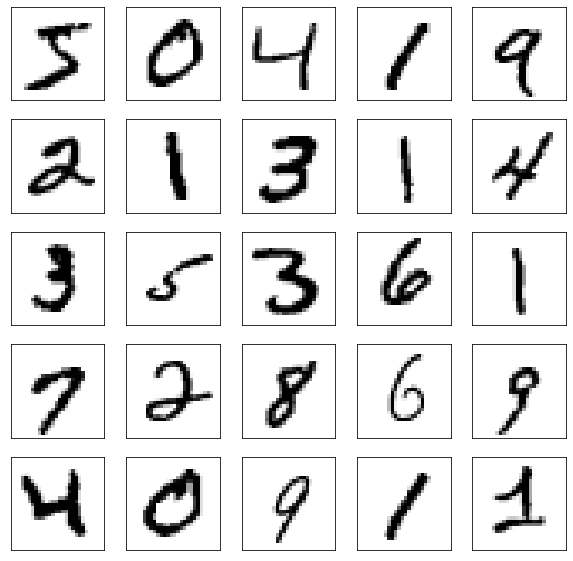

In [15]:
# Vamos a graficar las primeras 25 imágenes de la base

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
plt.show()

Como comentamos previamente, nuestra base consiste en imágenes de números escritos a mano que van del 0 al 9.

In [17]:
normal_model = Sequential()
normal_model.add(Flatten(input_shape=(28,28))) # El número de entradas son las dimensiones de sus imágnes
normal_model.add(Dense(128, activation='relu'))
normal_model.add(Dense(64, activation='relu'))
normal_model.add(Dense(10,activation='softmax')) # 10 nodos porque son 10 clases a clasificar

In [18]:

normal_model.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

normal_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


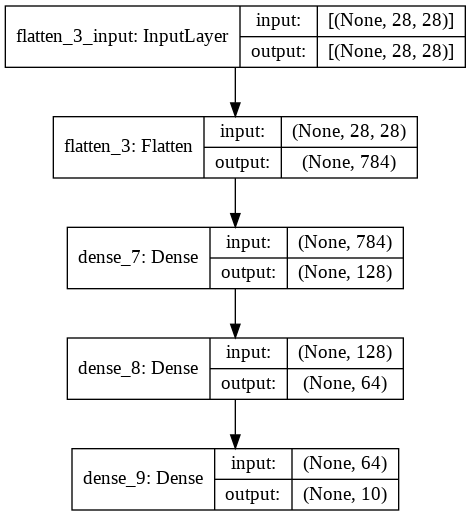

In [19]:
tf.keras.utils.plot_model(normal_model, show_shapes=True)

In [20]:
normal_model.fit(xtrain, ytrain, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2998 - accuracy: 0.4949
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1783 - accuracy: 0.7754
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1301 - accuracy: 0.8399
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1067 - accuracy: 0.8643
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0931 - accuracy: 0.8780
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.8877
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.8936
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.8981
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9028
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.066

Después de haber entrenado por 15 épocas conseguimos una exactitud del 93%. Un buen resultado pero se podría mejorar. Podemos observar que después de la época 6, la exactitud crecio más lento que en las anteriores, por lo que podríamos suponer que, a pesar de entrenar más épocas no conseguiremos un mejor resultado.

Ahora diseñaremos una red convolucional y entrenaremos por las mismas 15 épocas.

In [21]:
normal_model = Sequential()
normal_model.add(Flatten(input_shape=(28,28))) # El número de entradas son las dimensiones de sus imágnes
normal_model.add(Dense(128, activation='relu'))
normal_model.add(Dense(64, activation='relu'))
normal_model.add(Dense(64, activation='relu'))
normal_model.add(Dense(10,activation='softmax')) # 10 nodos porque son 10 clases a clasificar

normal_model.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

normal_model.summary()

normal_model.fit(xtrain, ytrain, epochs=15)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3083 - accuracy: 0.4603
Epoch 2/15
1

In [9]:
# Modelo de red convolucional

num_classes = 10
input_shape = (28,28,1)

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Volvemos a cargar la base de datos
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertimos los vectores de salida
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

La arquitectura que tendrá la red convolucional se compone de capas normales, capas convolucionales, capas de max pooling y una capa de salida.

* Capa de entrada
* Capa convolucional con un kernel de 3x3 y un tamaño de filtro de 64.
* Capa de MaxPooling, con tamaño de 2x2
* Capa de convolución
* Capa de MaxPooling
* Capa Flatten, donde se 'aplanan' todos los valores, es decir, se convierte en un vector columna.
* Capa de salida, donde el número de neuronas será igual al número de clases.

Para las capas que necesitan funciones de activación usaremos RELu, y *softmax* para la capa de salida.

In [22]:
# Construimos la red

model = Sequential(
    [
     tf.keras.Input(shape=input_shape),
     Conv2D(32, kernel_size=(3,3), activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Conv2D(64, kernel_size=(3,3), activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Flatten(),
     Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

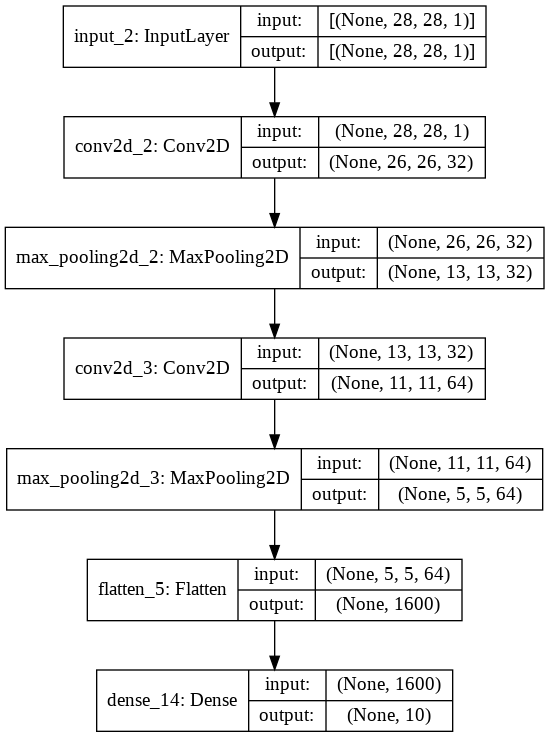

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

Vamos a entrenar nuestra red convolucional por el mismo número de épocas que la red normal.

Veamos si hay una mejora significativa en el desempeño.

Como se trata de un problema de clasificación, usaremos la métrica de *accuracy*.

In [24]:
# A entrenar
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.01)

Epoch 1/15
465/465 [==============================] - 3s 6ms/step - loss: 0.2790 - accuracy: 0.9225 - val_loss: 0.1441 - val_accuracy: 0.9717
Epoch 2/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0727 - accuracy: 0.9779 - val_loss: 0.1247 - val_accuracy: 0.9817
Epoch 3/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.1238 - val_accuracy: 0.9867
Epoch 4/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0994 - val_accuracy: 0.9833
Epoch 5/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.1098 - val_accuracy: 0.9833
Epoch 6/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.1003 - val_accuracy: 0.9850
Epoch 7/15
465/465 [==============================] - 3s 6ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.1065 - val_accuracy: 0.9850
Epoch 

Ya que terminó de entrenar, podemos observar que desde la segunda época, la red covolucional tuvo un mejor desepeño que su contraparte normal. Esto se debe a todo el preprocesamiento de los datos que hubo antes del entrenamiento. Al final del entrenamiento obtuvimos una exactitud del 98.98%, lo que quiere decir que nuestra red es casi perfecta.

Ahora tenemos que evaluar el modelo.

In [25]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Pérdida en el set de validación: %.2f" % (score[0]*100))
print("Exactitud en el set de validación: %.2f " % (score[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9893
Pérdida en el set de validación: 3.77
Exactitud en el set de validación: 98.93 


El valor de pérdida es bajo, lo que significa que se penaliza poco a la red por cometer un error.
Mientras que la exactitud en el set de validación es de 99%, que es bastante bueno.

Como conlusión, podemos decir que las redes convolucionales sobrepasan en rendimiento y resultados a una red normal; no porque estas tengan un diseño (o arquitectura) mejor sino por el preprocesamiento previo que hay antes del entrenamiento. A grosso modo, una red normal y una convolucional, en cuanto a su estrctura y matemáticas, son iguales, sin embargo, el hecho de delegar el procesado de los datos a otras capas, y no necesariamente a la red, impacta bastante en los resultados que obtendremos.